In [5]:
import numpy as np
from src.Node import *
import random
import networkx as nx
import matplotlib as plt

seed = 1234

class Network:

    def __init__(self, n_nodes : int, fully_connected = False, alternative_formulation = False):

        self.graph = nx.DiGraph()

        nodes = []
        for id in range(n_nodes):
          nodes.append(Node(id, random.random()*100, random.random() if alternative_formulation else None))
        
        adjacency_matrix = np.round(np.random.uniform(low=0.01, high = 1.000001, size = (n_nodes, n_nodes)), 2)
        adjacency_matrix[np.diag_indices(n = n_nodes, ndim = 2)] = 0.0

        if not fully_connected:
            indices = np.argwhere(adjacency_matrix).T
            random_indices = random.sample(range(0, indices.shape[1]), np.random.randint(low=10, high=16))
            random_indices = indices[:, random_indices]
            adjacency_matrix[tuple(random_indices)] = 0.0
        
        if alternative_formulation :
            for i in range(n_nodes):
                adjacency_matrix[:, i] = np.round( adjacency_matrix[:, i] / np.sum(adjacency_matrix[:, i]), 2)

        #self.graph.add_nodes_from(nodes)
        for i in range(n_nodes):
            for j in range(n_nodes):
                self.graph.add_edge(nodes[i], nodes[j], weight = adjacency_matrix[i][j])

        nx.draw(self.graph)
    
    def generate_live_edge_graph():
        live_edges = []
        self.live_edges_adjacency_matrix = np.zeros_like(self.adjacency_matrix)
        self.edges = np.argwhere(self.adjacency_matrix)

    def montecarlo_estimation():
        pass
        

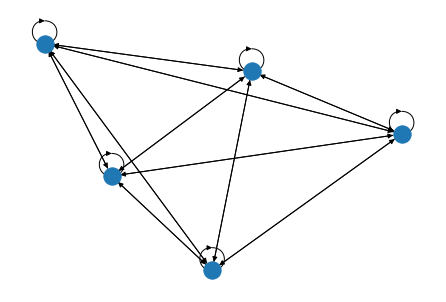

In [7]:
network = Network(5, True, True)